# Exploratory data analysis  

Exploring a part of the data locally using pandas to identify problems and validate the data before defining the batch processing logic.

In [35]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [36]:
# loading yellow and green taxi data from 2025-03

pd.set_option("display.min_rows", 100)

yellow_data_path = Path.cwd().parent / "data" / "yellow_tripdata_2025-03.parquet"
green_data_path = Path.cwd().parent / "data" / "green_tripdata_2025-03.parquet"
yellow_data = pd.read_parquet(yellow_data_path)
green_data = pd.read_parquet(green_data_path)

## initial exploration

In [37]:
yellow_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,N,140,236,1,7.90,3.50,0.5,2.60,0.00,1.0,15.50,2.5,0.00,0.00
1,1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,N,140,262,1,6.50,3.50,0.5,2.30,0.00,1.0,13.80,2.5,0.00,0.00
2,2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,N,161,68,1,14.90,1.00,0.5,5.16,0.00,1.0,25.81,2.5,0.00,0.75
3,2,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,N,231,13,1,7.20,1.00,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
4,1,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,N,163,236,1,8.60,4.25,0.5,2.85,0.00,1.0,17.20,2.5,0.00,0.75
5,1,2025-03-01 00:11:57,2025-03-01 00:28:33,0.0,2.00,1.0,N,166,74,1,16.30,1.00,0.5,2.00,0.00,1.0,20.80,0.0,0.00,0.00
6,2,2025-03-01 00:22:35,2025-03-01 00:34:06,2.0,3.27,1.0,N,88,79,1,17.00,1.00,0.5,4.55,0.00,1.0,27.30,2.5,0.00,0.75
7,2,2025-03-01 00:37:22,2025-03-01 00:45:03,1.0,0.95,1.0,N,114,107,1,8.60,1.00,0.5,2.00,0.00,1.0,16.35,2.5,0.00,0.75
8,2,2025-02-28 23:50:41,2025-03-01 00:03:51,1.0,2.09,1.0,N,79,186,1,13.50,1.00,0.5,3.85,0.00,1.0,23.10,2.5,0.00,0.75
9,2,2025-03-01 00:06:48,2025-03-01 00:18:44,1.0,1.43,1.0,N,186,107,1,12.10,1.00,0.5,3.57,0.00,1.0,21.42,2.5,0.00,0.75


In [38]:
green_data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-03-01 00:07:34,2025-03-01 00:24:52,N,1.0,75,239,1.0,2.20,18.40,...,0.5,5.91,0.00,NaN,1.0,29.56,1.0,1.0,2.75,0.00
1,2,2025-03-01 00:01:24,2025-03-01 00:10:03,N,1.0,41,42,1.0,1.06,8.60,...,0.5,3.33,0.00,NaN,1.0,14.43,1.0,1.0,0.00,0.00
2,2,2025-03-01 00:45:03,2025-03-01 01:05:38,N,1.0,265,56,1.0,18.91,69.50,...,0.5,0.00,0.00,NaN,1.0,72.00,2.0,1.0,0.00,0.00
3,2,2025-03-01 00:10:10,2025-03-01 00:29:35,N,5.0,82,236,1.0,8.36,30.17,...,0.5,3.35,6.94,NaN,1.0,44.71,1.0,1.0,2.75,0.00
4,2,2025-03-01 00:16:14,2025-03-01 00:19:44,N,1.0,66,33,1.0,0.82,5.80,...,0.5,0.00,0.00,NaN,1.0,8.30,2.0,1.0,0.00,0.00
5,2,2025-03-01 00:02:43,2025-03-01 00:15:52,N,1.0,134,122,1.0,4.94,21.90,...,0.5,0.00,0.00,NaN,1.0,24.40,2.0,1.0,0.00,0.00
6,2,2025-03-01 00:03:47,2025-03-01 00:10:45,N,1.0,260,260,1.0,0.81,8.60,...,0.5,2.00,0.00,NaN,1.0,13.10,1.0,1.0,0.00,0.00
7,2,2025-03-01 00:16:56,2025-03-01 00:26:26,N,1.0,244,243,2.0,1.56,11.40,...,0.5,0.00,0.00,NaN,1.0,13.90,2.0,1.0,0.00,0.00
8,2,2025-03-01 00:49:43,2025-03-01 00:58:25,N,1.0,75,262,1.0,1.53,10.70,...,0.5,2.39,0.00,NaN,1.0,18.34,1.0,1.0,2.75,0.00
9,1,2025-03-01 00:52:31,2025-03-01 00:53:00,N,5.0,129,129,1.0,0.00,35.00,...,0.0,7.00,0.00,NaN,0.0,42.00,1.0,2.0,0.00,0.00


In [39]:
yellow_data.columns, len(yellow_data.columns), yellow_data.isna().sum(), yellow_data.dtypes

(Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'Airport_fee',
        'cbd_congestion_fee'],
       dtype='object'),
 20,
 VendorID                      0
 tpep_pickup_datetime          0
 tpep_dropoff_datetime         0
 passenger_count          916663
 trip_distance                 0
 RatecodeID               916663
 store_and_fwd_flag       916663
 PULocationID                  0
 DOLocationID                  0
 payment_type                  0
 fare_amount                   0
 extra                         0
 mta_tax                       0
 tip_amount                    0
 tolls_amount                  0
 improvement_surcharge         0
 total_amount                  0
 congestion_s

In [40]:
green_data.columns, len(green_data.columns), green_data.isna().sum(), green_data.dtypes

(Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
        'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
        'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
        'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
        'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
        'cbd_congestion_fee'],
       dtype='object'),
 21,
 VendorID                     0
 lpep_pickup_datetime         0
 lpep_dropoff_datetime        0
 store_and_fwd_flag        3549
 RatecodeID                3549
 PULocationID                 0
 DOLocationID                 0
 passenger_count           3549
 trip_distance                0
 fare_amount                  0
 extra                        0
 mta_tax                      0
 tip_amount                   0
 tolls_amount                 0
 ehail_fee                51539
 improvement_surcharge        0
 total_amount                 0
 payment_type      

In [41]:
# checking if missing data appear in same rows

yellow_data_not_na = yellow_data[yellow_data["passenger_count"].notna()]
green_data_not_na = green_data[green_data["trip_type"].notna()]
yellow_data_not_na.isna().sum(), green_data_not_na.isna().sum()

(VendorID                 0
 tpep_pickup_datetime     0
 tpep_dropoff_datetime    0
 passenger_count          0
 trip_distance            0
 RatecodeID               0
 store_and_fwd_flag       0
 PULocationID             0
 DOLocationID             0
 payment_type             0
 fare_amount              0
 extra                    0
 mta_tax                  0
 tip_amount               0
 tolls_amount             0
 improvement_surcharge    0
 total_amount             0
 congestion_surcharge     0
 Airport_fee              0
 cbd_congestion_fee       0
 dtype: int64,
 VendorID                     0
 lpep_pickup_datetime         0
 lpep_dropoff_datetime        0
 store_and_fwd_flag           0
 RatecodeID                   0
 PULocationID                 0
 DOLocationID                 0
 passenger_count              0
 trip_distance                0
 fare_amount                  0
 extra                        0
 mta_tax                      0
 tip_amount                   0
 tolls_am

In [42]:
# checking if ehail_fee in the green taxi dataset is NaN in every row

green_data_no_ehail = green_data[green_data["ehail_fee"].notna()]
len(green_data_no_ehail)

0

In [43]:
# calculating the percentage of records containing missing values

yellow_data["passenger_count"].isna().sum() / len(yellow_data["passenger_count"]), green_data["trip_type"].isna().sum() / len(green_data["trip_type"])

(np.float64(0.22113538436820684), np.float64(0.06899629406856943))

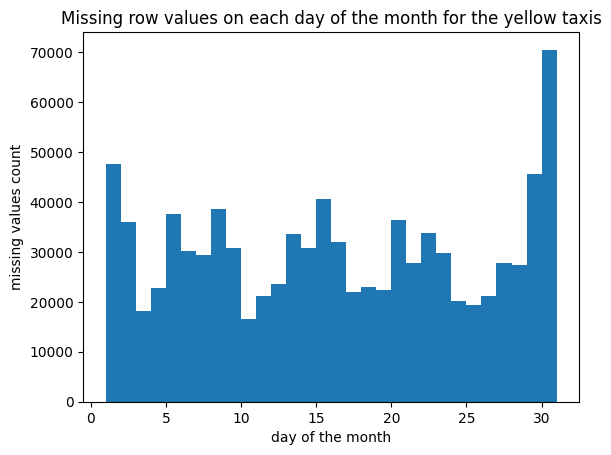

Yellow taxis
Total rows: 4145224
Rows with missing data: 916663
Rows without missing data: 3228561


In [44]:
# the initial inspection suggests that the missing values are clustered at the end of the month and are not spread across equally
yellow_data_day_col = yellow_data.copy()
yellow_data_day_col = yellow_data_day_col[yellow_data_day_col["tpep_pickup_datetime"].dt.month == 3]
yellow_data_day_col["day"] = yellow_data["tpep_pickup_datetime"].dt.day
yellow_data_day_col_isna = yellow_data_day_col[yellow_data_day_col["passenger_count"].isna()]

plt.hist(yellow_data_day_col_isna["day"], bins=range(1, 32))
plt.title("Missing row values on each day of the month for the yellow taxis")
plt.xlabel("day of the month")
plt.ylabel("missing values count")
plt.show()

print("Yellow taxis")
print(f"Total rows: {len(yellow_data_day_col)}")
print(f"Rows with missing data: {len(yellow_data_day_col_isna)}")
print(f"Rows without missing data: {len(yellow_data_day_col) - len(yellow_data_day_col_isna)}")

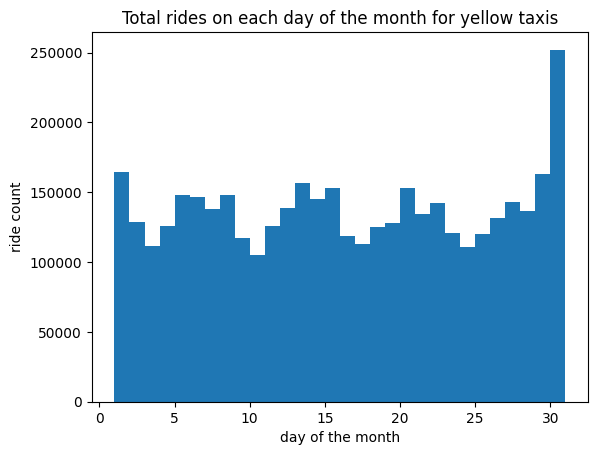

In [45]:
plt.hist(yellow_data_day_col["day"], bins=range(1, 32))
plt.title("Total rides on each day of the month for yellow taxis")
plt.xlabel("day of the month")
plt.ylabel("ride count")
plt.show()

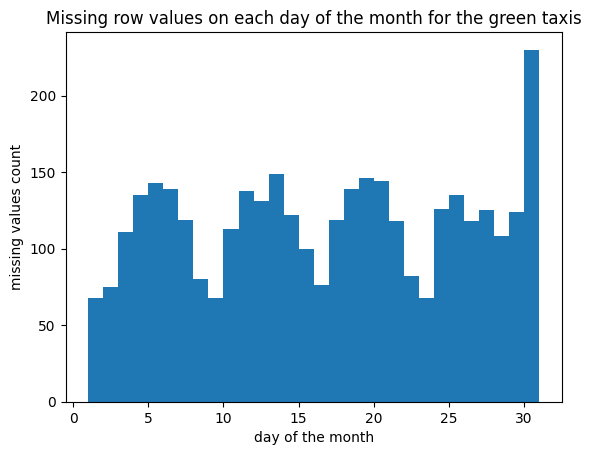

Green taxis
Total rows: 51528
Rows with missing data: 3549
Rows without missing data: 47979


In [46]:
green_data_day_col = green_data.copy()
green_data_day_col = green_data_day_col[green_data_day_col["lpep_pickup_datetime"].dt.month == 3]
green_data_day_col["day"] = green_data["lpep_pickup_datetime"].dt.day
green_data_day_col_isna = green_data_day_col[green_data_day_col["passenger_count"].isna()]

plt.hist(green_data_day_col_isna["day"], bins=range(1, 32))
plt.title("Missing row values on each day of the month for the green taxis")
plt.xlabel("day of the month")
plt.ylabel("missing values count")
plt.show()

print("Green taxis")
print(f"Total rows: {len(green_data_day_col)}")
print(f"Rows with missing data: {len(green_data_day_col_isna)}")
print(f"Rows without missing data: {len(green_data_day_col) - len(green_data_day_col_isna)}")

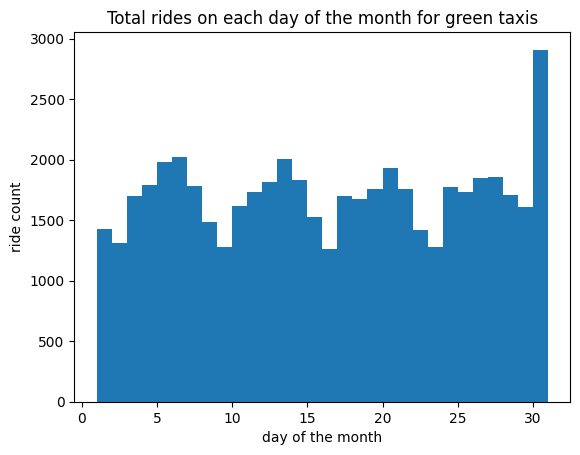

In [47]:
plt.hist(green_data_day_col["day"], bins=range(1, 32))
plt.title("Total rides on each day of the month for green taxis")
plt.xlabel("day of the month")
plt.ylabel("ride count")
plt.show()

In [48]:
yellow_rides_each_day = yellow_data_day_col["day"].value_counts().sort_index()
yellow_rides_each_day_isna = yellow_data_day_col_isna["day"].value_counts().sort_index()
combined_yellow_counts = pd.DataFrame({
    "total": yellow_rides_each_day,
    "with_missing_values": yellow_rides_each_day_isna
})

combined_yellow_counts.corr()


,total,with_missing_values
total,1.000000,0.765828
with_missing_values,0.765828,1.000000


In [49]:
green_rides_each_day = green_data_day_col["day"].value_counts().sort_index()
green_rides_each_day_isna = green_data_day_col_isna["day"].value_counts().sort_index()
combined_green_counts = pd.DataFrame({
    "total": green_rides_each_day,
    "with_missing_values": green_rides_each_day_isna
})

combined_green_counts.corr()

,total,with_missing_values
total,1.000000,0.852285
with_missing_values,0.852285,1.000000


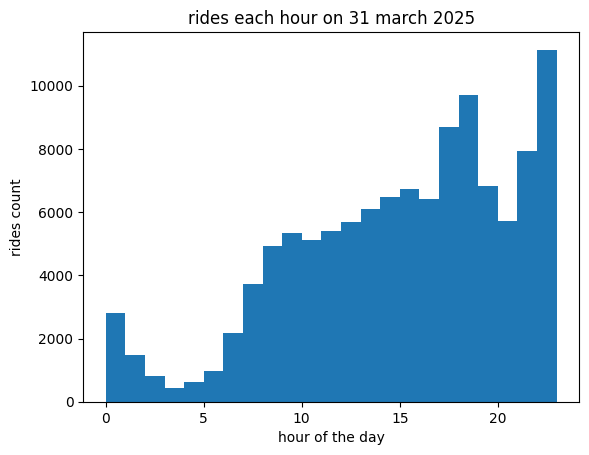

In [50]:
# taking a closer look at the last day of the month to inspect the high number of rides

yellow_only_31 = yellow_data_day_col[yellow_data_day_col["day"] == 31].copy()
yellow_only_31["hour"] = yellow_only_31["tpep_pickup_datetime"].dt.hour
plt.hist(yellow_only_31["hour"], bins=range(0, 24))
plt.title("rides each hour on 31 march 2025")
plt.xlabel("hour of the day")
plt.ylabel("rides count")
plt.show()

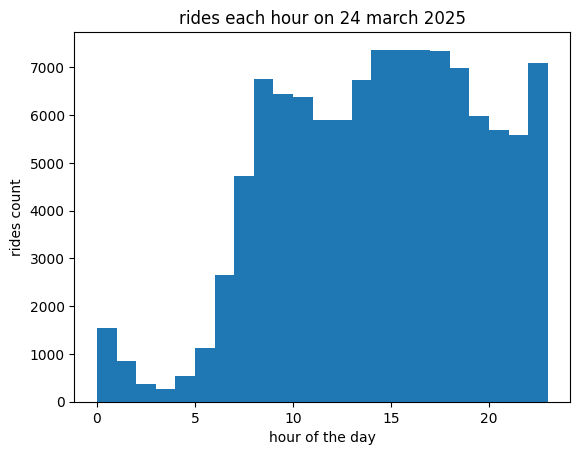

In [51]:
# week and two and three weeks ago for comparison

yellow_only_24 = yellow_data_day_col[yellow_data_day_col["day"] == 24].copy()
yellow_only_24["hour"] = yellow_only_24["tpep_pickup_datetime"].dt.hour
plt.hist(yellow_only_24["hour"], bins=range(0, 24))
plt.title("rides each hour on 24 march 2025")
plt.xlabel("hour of the day")
plt.ylabel("rides count")
plt.show()

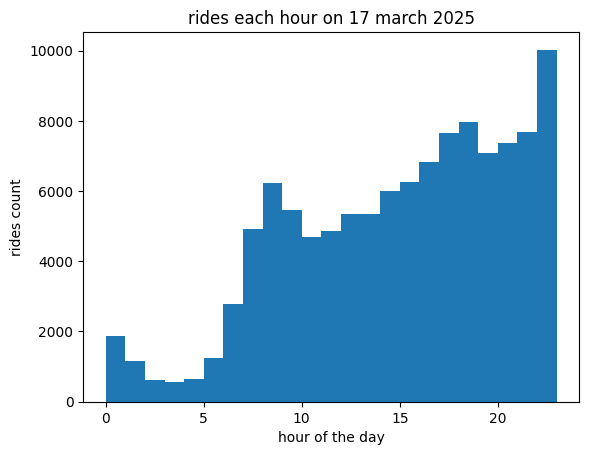

In [52]:
yellow_only_17 = yellow_data_day_col[yellow_data_day_col["day"] == 17].copy()
yellow_only_17["hour"] = yellow_only_17["tpep_pickup_datetime"].dt.hour
plt.hist(yellow_only_17["hour"], bins=range(0, 24))
plt.title("rides each hour on 17 march 2025")
plt.xlabel("hour of the day")
plt.ylabel("rides count")
plt.show()

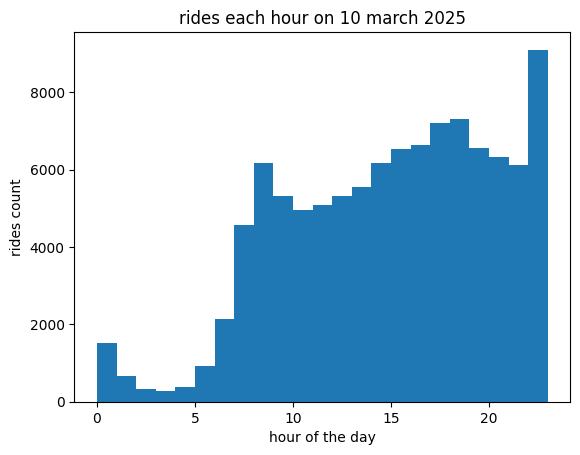

In [53]:
yellow_only_10 = yellow_data_day_col[yellow_data_day_col["day"] == 10].copy()
yellow_only_10["hour"] = yellow_only_10["tpep_pickup_datetime"].dt.hour
plt.hist(yellow_only_10["hour"], bins=range(0, 24))
plt.title("rides each hour on 10 march 2025")
plt.xlabel("hour of the day")
plt.ylabel("rides count")
plt.show()

the distribution of rides on the 31.03.25 doesnt seem to be out of the ordinary

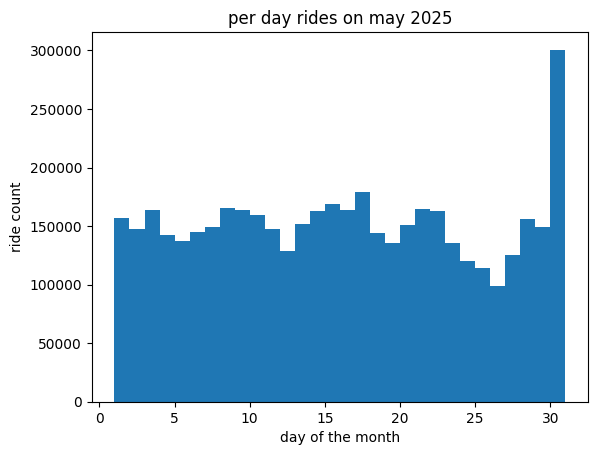

In [54]:
# comparing daily rides distribution to two different months

yellow_data_path_may_25 = Path.cwd().parent / "data" / "yellow_tripdata_2025-05.parquet"
yellow_data_may_25 = pd.read_parquet(yellow_data_path_may_25)
yellow_data_may_25_day_col = yellow_data_may_25.copy()
yellow_data_may_25_day_col = yellow_data_may_25_day_col[yellow_data_may_25_day_col["tpep_pickup_datetime"].dt.month == 5]
yellow_data_may_25_day_col["day"] = yellow_data_may_25_day_col["tpep_pickup_datetime"].dt.day

plt.hist(yellow_data_may_25_day_col["day"], bins=range(1, 32))
plt.title("per day rides on may 2025")
plt.xlabel("day of the month")
plt.ylabel("ride count")
plt.show()

In [55]:
yellow_data_path_nov_24 = Path.cwd().parent / "data" / "green_tripdata_2024-11.parquet"
yellow_data_nov_24 = pd.read_parquet(yellow_data_path_nov_24)

In [56]:
yellow_data_nov_24.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

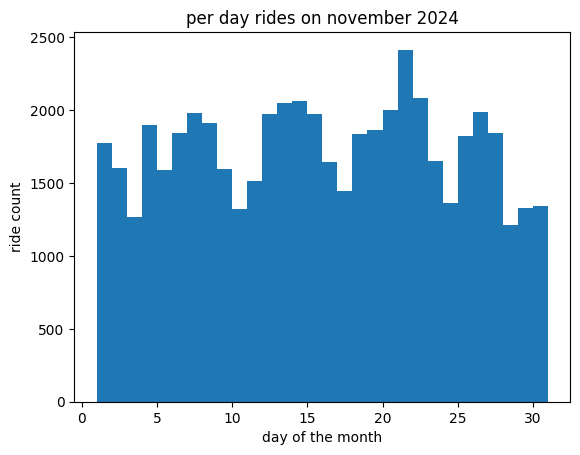

In [57]:
yellow_data_nov_24_day_col = yellow_data_nov_24.copy()
yellow_data_nov_24_day_col = yellow_data_nov_24_day_col[yellow_data_nov_24_day_col["lpep_pickup_datetime"].dt.month == 11]
yellow_data_nov_24_day_col["day"] = yellow_data_nov_24_day_col["lpep_pickup_datetime"].dt.day

plt.hist(yellow_data_nov_24_day_col["day"], bins=range(1, 32))
plt.title("per day rides on november 2024")
plt.xlabel("day of the month")
plt.ylabel("ride count")
plt.show()

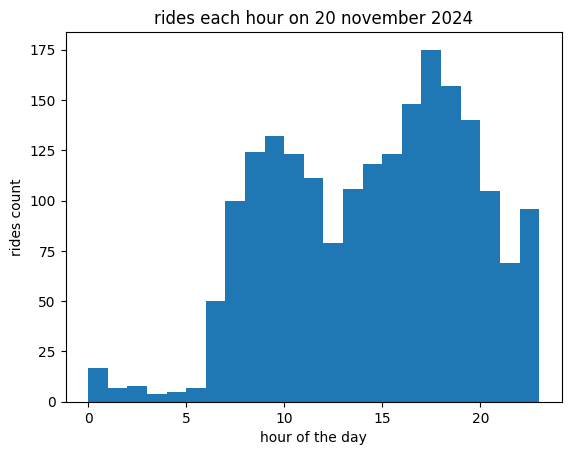

In [58]:
# rides per hour distribution for a random day of november 2024

nov_24_only_20 = yellow_data_nov_24_day_col[yellow_data_nov_24_day_col["day"] == 20].copy()
nov_24_only_20["hour"] = nov_24_only_20["lpep_pickup_datetime"].dt.hour
plt.hist(nov_24_only_20["hour"], bins=range(0, 24))
plt.title("rides each hour on 20 november 2024")
plt.xlabel("hour of the day")
plt.ylabel("rides count")
plt.show()

data from november 2024 doesnt spike at the last day of the month and the last hour of the day
march 2025 and may 2025 both show spiking last bin, as if some data was artificially placed there

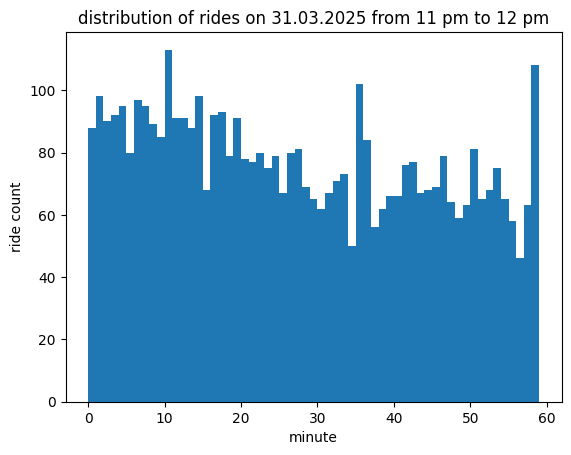

In [59]:
# rides per minute distribution for 11 pm 31 march 2025

yellow_data_31_03_25 = yellow_data[
        (yellow_data["tpep_pickup_datetime"].dt.day == 31)
        & (yellow_data["tpep_pickup_datetime"].dt.hour == 23)
    ].copy()
yellow_data_31_03_25["minute"] = yellow_data["tpep_pickup_datetime"].dt.minute

plt.hist(yellow_data_31_03_25["minute"], bins=range(0, 60))
plt.title("distribution of rides on 31.03.2025 from 11 pm to 12 pm")
plt.xlabel("minute")
plt.ylabel("ride count")
plt.show()

3 spikes are visible but they dont seem impossible.  
further analysis would be required to try to answer why the rides sometimes seem to be clustered at the last day of the month